# Part 2 (exercise sheet): Using DeerLab for fitting DEER

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import deerlab as dl

On this exercise you will analyze an experimental 4-pulse DEER signal. 

<img style="width:500px; alignment:center; margin:auto; display:block; " src="https://raw.githubusercontent.com/JeschkeLab/DeerLabWorkshop2022/main/images/4pdeer_sequence_starttime.svg">


The experiment was acquired with the following experimental setup: 

| Delay | Length | Description | 
| :---: | :---: | --- |
| $\tau_1$ |  0.3μs |       First inter-pulse delay | 
| $\tau_2$ |  4.0μs  |      Second inter-pulse delay | 
| $t_0$ |  0.1μs |   Start value | 


### Exercise 2.1: Loading and pre-processing DEER data

*Available time: 8min*

- Load the experimental 4-pulse DEER dipolar signal ``example_4pdeer_1.DTA`` located in the ``data`` folder (relative path ``../data/``) of this workshop's workspace.

- Assignt the experimental delays $\tau_1$, $\tau_2$ and $t_0$ to variables for later use.  

- Pre-process the data such that the data is only real-valued after proper phase correction.

- Account for the start time $t_0$ of the of the experiment.

- Plot the resulting pre-processed signal.

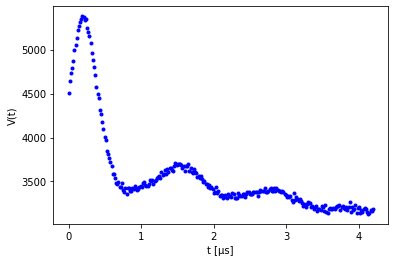

In [3]:

# The full path with filename can be directly passed to the function as well
t,Vexp = dl.deerload('../../data/example_4pdeer_1.DTA') 

# Experiment details 
t0 = 0.1 # μs 
tau1 = 0.3 # μs 
tau2 = 4.0 # μs 

# Phase correction
Vexp = dl.correctphase(Vexp)

# Start time correction
t = t - t[0] # Set the first time interval to zero 
t = t + t0   # Account for the acquistion delay 

# Plot the data
plt.plot(t,Vexp,'b.')
plt.xlabel('t [μs]')
plt.ylabel('V(t)')
plt.show()

### Exercise 2.2: Constructing the 4-pulse DEER model

*Available time: 5min*

- Construct a model of the experiment using the [``ex_4pdeer``]((https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.ex_4pdeer.html#deerlab.ex_4pdeer)) function. Include only the first dipolar pathway.

- Define a distance vector in the range 2.2-5.2nm with a 0.02nm resolution.

- Construct the a single-pathway model of the 4-pulse DEER signal using the [``dipolarmodel``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.dipolarmodel.html#deerlab.dipolarmodel) function. Include the experiment information to constrain your model parameters. 

- Display the model's information

In [5]:
# Experiment model
my4pdeer = dl.ex_4pdeer(tau1,tau2,pathways=[1])

# Define the distance range
r = np.arange(2.2,5.2,0.02) #nm

# Construct the model
Vmodel = dl.dipolarmodel(t,r, experiment=my4pdeer) 

# Display information about the model
print(Vmodel)

Description: Dipolar signal model
Signature: (mod, reftime, conc, P)
Constants: []
Parameter Table: 
========= ======= ======= ======== ======== ====== ====================================== 
 Name      Lower   Upper    Type    Frozen   Unit   Description                           
========= ======= ======= ======== ======== ====== ====================================== 
 mod           0       1   nonlin     No            Modulation depth                      
 reftime    0.25    0.35   nonlin     No      μs    Refocusing time                       
 conc       0.01   5e+03   nonlin     No      μM    Spin concentration                    
 P             0     inf   linear     No     nm⁻¹   Non-parametric distance distribution  
========= ======= ======= ======== ======== ====== ====================================== 


### Exercise 2.3: Fitting the model to the data

*Available time: 2min*

- Fit your model to the experimental data using the [``fit``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.fit.html#deerlab.fit) function. 

    *Note:* Use the keyword arguments ``ftol=1e-3`` and ``regparam=0.0908`` with the ``fit`` function to speedup the computation (due to low resources on JupyterLab).

In [6]:
# Fit the model to the data
results = dl.fit(Vmodel,Vexp,verbose=2,ftol=1e-3,regparam=0.0908)

# Usually leave the regparam and ftol options to their defaults (here needed due to low resources)

[9-8-2022 9:53:49] Preparing the SNLLS analysis...
[9-8-2022 9:53:49] Preparations completed.
[9-8-2022 9:53:49] Non-linear least-squares routine in progress...
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.4615e+07                                    1.60e+08    
       1              2         6.4180e+06      2.82e+07       2.17e-01       2.38e+08    
       2              3         1.6323e+05      6.25e+06       1.07e+02       9.89e+06    
       3              4         6.8754e+04      9.45e+04       5.94e+00       2.78e+06    
       4              5         6.5051e+04      3.70e+03       2.16e+00       5.38e+05    
       5              6         6.4931e+04      1.19e+02       3.53e-01       1.57e+04    
       6              7         6.4931e+04      9.78e-02       1.18e-02       3.18e+01    
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 3.4615e+07, final cost 6.4931e+

- Check the the fit of the model to the data by plotting the results.

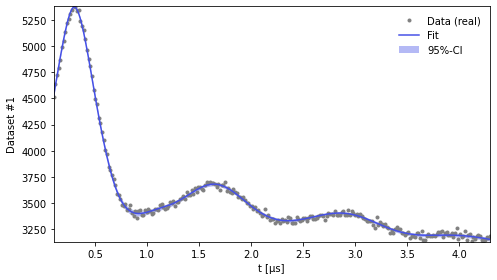

In [7]:
# Plot the data and fit
results.plot(axis=t,xlabel='t [μs]')

# Show the plot
plt.show() 

### Exercise 2.4: Extracting results and uncertainties

*Available time: 7min*

- Inspect the summary of the fit's results. Assess the goodness-of-fit and the fitted parameters. 


In [8]:
print(results)

Goodness-of-fit: 
========= ============= ============ ======== ========== 
 Dataset   Noise level   Reduced 𝛘2    RMSD      AIC     
========= ============= ============ ======== ========== 
   #1        24.222        0.967      21.633   2990.215  
========= ============= ============ ======== ========== 
Model hyperparameters: 
 Regularization parameter  
          0.091            
Model parameters: 
=========== =================== ========================= ====== ====================================== 
 Parameter   Value               95%-Confidence interval   Unit   Description                           
=========== =================== ========================= ====== ====================================== 
 mod         0.303               (0.300,0.305)                    Modulation depth                      
 reftime     0.299               (0.298,0.301)              μs    Refocusing time                       
 conc        148.129             (143.733,152.525)          μM    Sp

- Plot the fitted distance distribution along its 95%-confidence band.

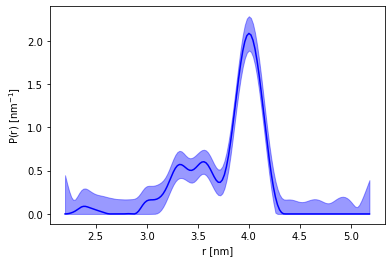

In [8]:
# Get the fitted distance distribution
Pfit = results.P
# Get the uncertainty quantification of the distance distribution
Puq = results.PUncert
# Get its 95% confidence intervals
Pci95 = Puq.ci(95)

# Get the lower/upper boundaries of the confidence intervals
Pci95_lower = Pci95[:,0]
Pci95_upper = Pci95[:,1]

# Plot the fitted distance distribution
plt.plot(r,Pfit,'b')
# Plot the confidence bands as a filled area
plt.fill_between(r,Pci95_lower,Pci95_upper,color='b',alpha=0.4)
plt.xlabel('r [nm]')
plt.ylabel('P(r) [nm$^{-1}$]')
plt.show()


- Get statistical information on the distance distribution using the ``diststats`` function. How many modes does the distance distribution have? What is the median distance?


In [9]:
stats = dl.diststats(r,Pfit,Puq,verbose=True)

-------------------------------------------------
Distribution Statistics
-------------------------------------------------
Range                    2.20-5.18 nm
Integral                 1.00
-------------------------------------------------
Location
-------------------------------------------------
Range                    2.20-5.18 nm
Mean                     3.78 (3.77,3.80) nm
Median                   3.91 (3.90,3.92) nm
Interquartile mean       3.88 (3.87,3.89) nm
Mode                     4.00 nm
-------------------------------------------------
Spread
-------------------------------------------------
Standard deviation       0.36 (0.33,0.39) nm
Mean absolute deviation  0.29 (0.27,0.30) nm
Interquartile range      0.48 (0.46,0.51) nm
Variance                 0.13 (0.11,0.15) nm²
-------------------------------------------------
Shape
-------------------------------------------------
Modality                 3
Skewness                 -1.37 (-2.32,-0.42) 
Kurtosis                 -

------------------

### Exercise 2.5: Customizing the dipolar signal model

*Available time: 10min*

- Construct a new model for the 4-pulse DEER signal using the [``dipolarmodel``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.dipolarmodel.html#deerlab.dipolarmodel) function. The new model should

    - Include the experimental information to constraint the model parameters.  
    - Represent the distance distributions as a bimodal Gaussian distribution (in DeerLab given by the [``dd_gauss2``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.dd_gauss2.html#deerlab.dd_gauss2) model).
    - Approximate the background decay as a phenomenological exponential decay (in DeerLab given by the [``bg_exp``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.bg_exp.html#deerlab.bg_exp) model). 
    

- Display the model summary.

In [10]:
# Construct the dipolar model with a Gaussian distance distribution and stretched exponential background 
Vmodel = dl.dipolarmodel(t,r, experiment=my4pdeer, Pmodel=dl.dd_gauss2, Bmodel=dl.bg_exp) 

# Display information about the dipolar model
print(Vmodel)

Description: Dipolar signal model
Signature: (mod, reftime, decay, mean1, std1, mean2, std2, amp1, amp2)
Constants: []
Parameter Table: 
========= ======= ======= ======== ======== ====== ================================= 
 Name      Lower   Upper    Type    Frozen   Unit   Description                      
========= ======= ======= ======== ======== ====== ================================= 
 mod           0       1   nonlin     No            Modulation depth                 
 reftime    0.25    0.35   nonlin     No      μs    Refocusing time                  
 decay         0     200   nonlin     No     μs⁻¹   Decay rate                       
 mean1         1      20   nonlin     No      nm    1st Gaussian mean                
 std1       0.05     2.5   nonlin     No      nm    1st Gaussian standard deviation  
 mean2         1      20   nonlin     No      nm    2nd Gaussian mean                
 std2       0.05     2.5   nonlin     No      nm    2nd Gaussian standard deviation  
 am

- Fit your model to the experimental data using the [``fit``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.fit.html#deerlab.fit) function. 

    *Note:* Use the keyword argument ``ftol=1e-3`` with the ``fit`` function to speedup the computation (due to low resources on JupyterLab).

In [16]:
# Fit the model to the data
results = dl.fit(Vmodel,Vexp,verbose=2, ftol=1e-3)

[9-8-2022 11:27:49] Preparing the SNLLS analysis...
[9-8-2022 11:27:49] Preparations completed.
[9-8-2022 11:27:49] Non-linear least-squares routine in progress...
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3838e+08                                    2.85e+08    
       1              2         4.0688e+07      9.77e+07       2.79e+00       9.05e+07    
       2              3         1.1535e+07      2.92e+07       1.18e+01       6.23e+07    
       3              4         2.8203e+06      8.71e+06       8.17e+00       2.17e+07    
       4              5         1.3337e+06      1.49e+06       4.55e+00       4.64e+06    
       5              6         4.9122e+05      8.42e+05       2.24e+00       4.02e+06    
       6              7         2.9427e+05      1.97e+05       7.06e-01       1.14e+07    
       7              8         2.4265e+05      5.16e+04       1.35e+00       3.97e+05    
       8         

- Plot the data and its fit, and print the fit results summary 

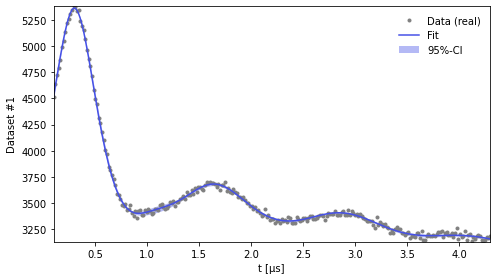

Goodness-of-fit: 
========= ============= ============ ======== ========== 
 Dataset   Noise level   Reduced 𝛘2    RMSD      AIC     
========= ============= ============ ======== ========== 
   #1        24.222        0.842      21.932   3075.652  
========= ============= ============ ======== ========== 
Model hyperparameters: 
 Regularization parameter  
         989.165           
Model parameters: 
=========== ========== ========================= ====== ================================= 
 Parameter   Value      95%-Confidence interval   Unit   Description                      
=========== ========== ========================= ====== ================================= 
 mod         0.301      (0.299,0.303)                    Modulation depth                 
 reftime     0.300      (0.298,0.301)              μs    Refocusing time                  
 decay       0.045      (0.044,0.046)             μs⁻¹   Decay rate                       
 mean1       4.010      (4.000,4.020)          

In [15]:
# Plot the experimental data and fit
results.plot(axis=t,xlabel='t [μs]')
plt.show() 

print(results)

- Calculate and plot the fitted bimodal Gaussian distance distribution and its 95%-confidence bands. 

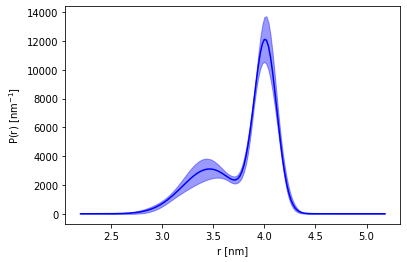

In [13]:
# Evaluate the distance distribution at the fitted parameter values
Pfit = results.evaluate(dl.dd_gauss2,r)

# Propagate the uncertainty in the parameteres to the distance distribution model
Puq = results.propagate(dl.dd_gauss2,r)

# Get its 95% confidence intervals
Pci95 = Puq.ci(95)

# Get the lower/upper boundaries of the confidence intervals
Pci95_lower = Pci95[:,0]
Pci95_upper = Pci95[:,1]

# Plot the fitted distance distribution
plt.plot(r,Pfit,'b')
# Plot the confidence bands as a filled area
plt.fill_between(r,Pci95_lower,Pci95_upper,color='b',alpha=0.4)
plt.xlabel('r [nm]')
plt.ylabel('P(r) [nm$^{-1}$]')
plt.show()



## Exercise 2.6: Fitting DEER data with multiple pathway contributions 

*Available time: 8min*

Remember, the dipolar pathways of the 4-pulse DEER experiment are:

<img src="https://github.com/JeschkeLab/DeerLabWorkshop2022/raw/main/images/pathways_scheme.png" alt="drawing" style="width:300px; margin:auto; display:block; "/>


| Pathway | Refocusing time | Description | 
| :---: | ------ | -------------- |
| 1 | $t = \tau_1$ | Main contribution |
| 2 | $t = \tau_1+\tau_2$ | "2+1" contribution | 
| 3 | $t = 0$  | "Inverse 2+1" contribution | 
| 4 | $t = \tau_2$ | No description  | 

In this exercise you will analyze the experimental 4-pulse DEER data ``example_4pdeer_2.DTA`` with additional pathway contributions due to, e.g., pulse excitation overlap. The data was acquired with the following experimental parameters: 

| Delay | Length | Description | 
| :---: | :---: | --- |
| $\tau_1$ |  0.5μs |       First inter-pulse delay | 
| $\tau_2$ |  3.5μs  |      Second inter-pulse delay | 
| $t_0$ |  0.1μs |  Start time | 


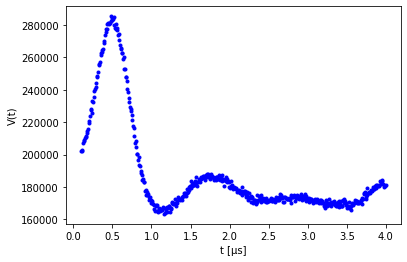

In [20]:
# File location
path = '../../data/'
file = 'example_4pdeer_2.DTA'

# Experimental parameters
tau1 = 0.5      # First inter-pulse delay, μs
tau2 = 3.5      # Second inter-pulse delay, μs
deadtime = 0.1  # Acquisition start time, μs

# Load the experimental data
t,Vexp = dl.deerload(path + file)

# Pre-processing
Vexp = dl.correctphase(Vexp) # Phase correction
t = t + deadtime             # Account for deadtime

# Plot the pre-processed data
plt.plot(t,Vexp,'b.')
plt.xlabel('t [μs]')
plt.ylabel('V(t)')
plt.show()

- Construct the distance vector in the range 2.5-5nm with a resolution of 0.05nm.
- Construct the experiment model with  [``ex_4pdeer``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.ex_4pdeer.html#deerlab.ex_4pdeer). Take into account only pathways #1-3 (in this case we know that pathway #4 must be negligible, so we will leave it out for the sake of speed).
- Construct the dipolar model for the dipolar signal using [``dipolarmodel``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.dipolarmodel.html#deerlab.dipolarmodel).
- Fit the model to the data using a the keyword arguments ``regparam=0.169`` and ``ftol=1e-2`` with the function [``fit``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.fit.html#deerlab.fit).
- Display the summery of the fit results. 

In [30]:
# Distance vector
r = np.arange(2.5,5,0.05) # nm

# Construct the model
experiment = dl.ex_4pdeer(tau1,tau2, pathways=[1,2,3])
Vmodel = dl.dipolarmodel(t,r,experiment=experiment)

# Fit the model to the data
results = dl.fit(Vmodel,Vexp, verbose=2, regparam=0.169, ftol=1e-2)


[9-8-2022 14:37:33] Preparing the SNLLS analysis...
[9-8-2022 14:37:33] Preparations completed.
[9-8-2022 14:37:33] Non-linear least-squares routine in progress...
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.1653e+11                                    9.75e+11    
       1              3         2.2267e+10      1.94e+11       2.62e+02       3.35e+11    
       2              4         3.3459e+09      1.89e+10       5.25e+01       7.02e+09    
       3              5         1.4802e+09      1.87e+09       8.84e+01       3.78e+10    
       4              6         8.2219e+08      6.58e+08       7.94e+01       1.33e+11    
       5              7         5.5419e+08      2.68e+08       9.22e+00       8.04e+08    
       6              8         5.5214e+08      2.05e+06       1.43e+00       3.49e+07    
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 2.1653e+11, final cost 5.521

In [31]:
# Print results summary
print(results)

Goodness-of-fit: 
========= ============= ============ ========== ========== 
 Dataset   Noise level   Reduced 𝛘2     RMSD       AIC     
========= ============= ============ ========== ========== 
   #1       1298.465       1.239      1433.145   1.01e+04  
========= ============= ============ ========== ========== 
Model hyperparameters: 
 Regularization parameter  
          0.169            
Model parameters: 
=========== =================== ========================= ====== ====================================== 
 Parameter   Value               95%-Confidence interval   Unit   Description                           
=========== =================== ========================= ====== ====================================== 
 lam1        0.308               (0.305,0.311)                    Amplitude of pathway #1               
 reftime1    0.501               (0.494,0.508)              μs    Refocusing time of pathway #1         
 lam2        0.052               (0.049,0.056)            

- Execute the cell below to evaluate the function definition.

In [27]:
def plot_pathway_decomposition(results):
    # Extract fitted dipolar signal
    Vfit = results.model
    # Construct figure with custom size
    plt.figure(figsize=[12,4])
    # Define color HEX values
    violet = '#4550e6'
    green = '#3cb4c6'
    red = '#f84862'
    # Plot the experimental data and the fitted signal
    plt.subplot(121)
    plt.plot(t,Vexp,'.',color='grey',label='Data')
    plt.plot(t,Vfit,linewidth=3,color=violet,label='Fit')
    plt.legend(frameon=False,loc='best')
    plt.xlabel('Time $t$ (μs)')
    plt.ylabel('$V(t)$ (arb.u.)')
    # Plot the contributions of the individual pathways
    plt.subplot(122)
    lams = [results.lam1, results.lam2, results.lam3]
    reftimes = [results.reftime1, results.reftime2, results.reftime3]
    colors= [green, red, violet]
    # Calculat the total background function
    Vinter = results.P_scale*(1-np.sum(lams))*np.prod([dl.bg_hom3d(t-reftime,results.conc,lam) for lam,reftime in zip(lams,reftimes)],axis=0)
    # Loop over individual pathways
    for n,(lam,reftime,color) in enumerate(zip(lams,reftimes,colors)):
        # Calculate and plot the contribution
        Vpath = (1-np.sum(lams) + lam*dl.dipolarkernel(t-reftime,r)@Pfit)*Vinter
        plt.plot(t,Vpath,linewidth=3,label=f'Pathway #{n+1}',color=color)
    plt.legend(frameon=False,loc='best')
    plt.xlabel('Time $t$ (μs)')
    plt.ylabel('$V(t)$ (arb.u.)')
    plt.tight_layout()
    plt.show()

- Plot the fitted signal and the contributions of the individual dipolar pathways.

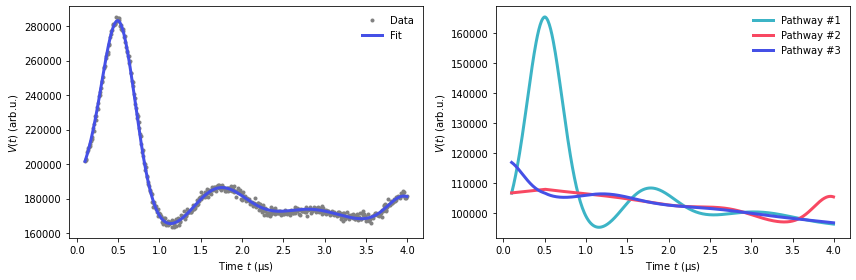

In [28]:
plot_pathway_decomposition(results)

- Plot the fitted distance distribution and its 95%-confidence intervals. (Tip: Re-use the code from previous exercises)

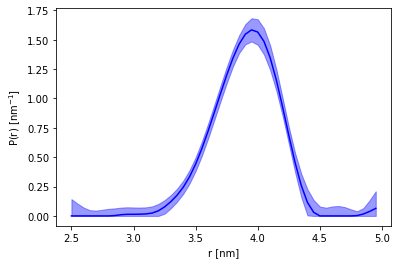

In [26]:
# Get the fitted distance distribution
Pfit = results.P
# Get the uncertainty quantification of the distance distribution
Puq = results.PUncert
# Get its 95% confidence intervals
Pci95 = Puq.ci(95)

# Get the lower/upper boundaries of the confidence intervals
Pci95_lower = Pci95[:,0]
Pci95_upper = Pci95[:,1]

# Plot the fitted distance distribution
plt.plot(r,Pfit,'b')
# Plot the confidence bands as a filled area
plt.fill_between(r,Pci95_lower,Pci95_upper,color='b',alpha=0.4)
plt.xlabel('r [nm]')
plt.ylabel('P(r) [nm$^{-1}$]')
plt.show()

--------------------